In [1]:
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
df = pd.DataFrame(
    {
        'GTP':[10, 100, 1000], 
        '0ATP': [1.94, 7.44, 12.92], 
        '003ATP': [1.72, 7.35, 12.94], 
        '010ATP': [1.67, 6.48, 13.59], 
        '030ATP':[1.11, 6.02, 12.31], 
        '100ATP':[0.59, 3.91, 10.17], 
        '300ATP': [0.23, 1.64, 6.33]
    }
)

In [2]:
def four_param_logistic(x, bottom, top, ic50, hill):
    return bottom + (top - bottom) / (1 + (x / ic50)**hill)


atp_conc = np.array([0, 0.03, 0.1, 0.3, 1, 3])  
activity = df.iloc[0, 1:].values


p0 = [0.001, 1.725, 0.5, 1] 
bounds = ([0, 1.72, 0.03, 0.1], [0.23, 1.73, 1, 2])  
params, cov = curve_fit(four_param_logistic, atp_conc, activity, p0=p0, bounds=bounds)
print(f'Low Activity: {params[0]:.2f};\nHigh Activity: {params[1]:.2f};\nIC50: {params[2]:.2f};\nSlope: {params[3]:.2f}')


Low Activity: 0.17;
High Activity: 1.73;
IC50: 0.45;
Slope: 1.50


In [3]:
def fit_ic50(p0s:list, bounds:list, conc, activities):
    parameters = []
    covs = []
    for i in range(len(p0s)):
        assert p0s[i][0] != 0, ValueError()
        activity = activities.iloc[0, 1:].values
        params, cov = curve_fit(four_param_logistic, conc, activity, p0=p0s[i], bounds=bounds[i])
        parameters.append(params)
        covs.append(cov)
    return parameters, covs


a = np.arange(0, 15, 0.02)
fit_y = four_param_logistic(a, 0.17394776,1.73,0.44940049,1.50459321)
plt.plot(a, fit_y)
plt.scatter((atp_conc), df.iloc[0, 1:])

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\m'
C:\Users\hp\AppData\Local\Temp\ipykernel_17884\1379395086.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Activity\n($\mu mol/mg \cdot min$)')
C:\Users\hp\AppData\Local\Temp\ipykernel_17884\2207245494.py:2: RuntimeWarning: invalid value encountered in power
  return bottom + (top - bottom) / (1 + (x / ic50)**hill)
C:\Users\hp\AppData\Local\Temp\ipykernel_17884\1379395086.py:3: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(a), fit_logy, color = 'grey')


Text(0, 0.5, 'Activity\n($\\mu mol/mg \\cdot min$)')

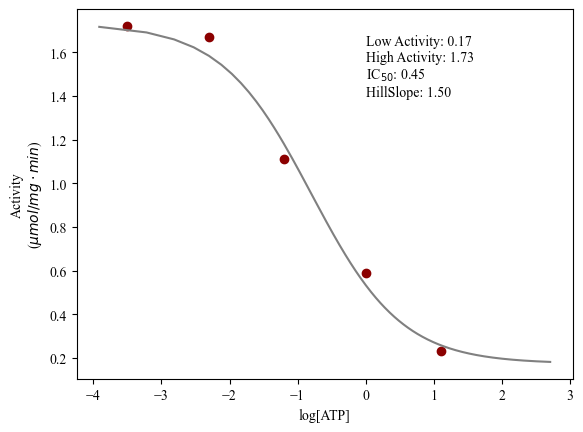

In [4]:
a = np.arange(-15, 15, 0.02)
fit_logy = four_param_logistic(a, 0.17394776,1.73,0.44940049,1.50459321)
plt.plot(np.log(a), fit_logy, color = 'grey')
plt.scatter(np.log(atp_conc[1:]), df.iloc[0, 2:], c = 'darkred')
plt.text(
    0, 1.4, 
    f'Low Activity: {params[0]:.2f}\nHigh Activity: {params[1]:.2f}\nIC$_{{50}}$: {params[2]:.2f}\nHillSlope: {params[3]:.2f}'
)
plt.xlabel('log[ATP]')
plt.ylabel('Activity\n($\mu mol/mg \cdot min$)')
#plt.savefig('4pl_fit.png', dpi = 600)

In [5]:
def four_param_logistic(x, bottom, top, ic50, hill):
    return bottom + (top - bottom) / (1 + (x / ic50)**hill)

def fit_ic50(p0s:list, bounds:list, conc, activities):
    parameters = []
    covs = []
    for i in range(len(p0s)):
        assert p0s[i][0] != 0, ValueError()
        activity = activities.iloc[i, :].values
        params, cov = curve_fit(four_param_logistic, conc, activity, p0=p0s[i], bounds=bounds[i])
        parameters.append(params)
        covs.append(cov)
        print(f'GTP level{i}:\nLow Activity: {params[0]:.2f};\nHigh Activity: {params[1]:.2f};\nIC50: {params[2]:.2f};\nSlope: {params[3]:.2f}\n{'-'*10}')
    return parameters, covs

p0s = [[0.001, 1.725, 0.5, 1], [0.001, 7.44, 1.05, 1], [0.001, 13.0, 2.7, 1]]
bounds = [
    ([0, 1.72, 0.03, 0.1], [0.23, 1.73, 1, 2]), 
    ([0, 7.35, 1.0, 0.5], [1.64, 7.44, 1.5, 2]), 
    ([0, 12.92, 1, 0.1], [0.23, 13.1, 3, 2])
]
atp_conc = np.array([0.03, 0.1, 0.3, 1, 3])  
activities = df.iloc[:, 2:]
parameters, covs = fit_ic50(p0s, bounds, atp_conc, activities)

GTP level0:
Low Activity: 0.17;
High Activity: 1.73;
IC50: 0.45;
Slope: 1.50
----------
GTP level1:
Low Activity: 0.00;
High Activity: 7.35;
IC50: 1.07;
Slope: 1.11
----------
GTP level2:
Low Activity: 0.23;
High Activity: 13.10;
IC50: 2.72;
Slope: 1.28
----------


<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\m'
C:\Users\hp\AppData\Local\Temp\ipykernel_17884\2546940878.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('Activity\n($\mu mol/mg \cdot min$)')
C:\Users\hp\AppData\Local\Temp\ipykernel_17884\2546940878.py:20: SyntaxWarning: invalid escape sequence '\m'
  legends = ['10 $\mu mol/L$ GTP', '100 $\mu mol/L$ GTP', '1000 $\mu mol/L$ GTP']
C:\Users\hp\AppData\Local\Temp\ipykernel_17884\2546940878.py:20: SyntaxWarning: invalid escape sequence '\m'
  legends = ['10 $\mu mol/L$ GTP', '100 $\mu mol/L$ GTP', '1000 $\mu mol/L$ GTP']
C:\Users\hp\AppData\Local\Temp\ipykernel_17884\254

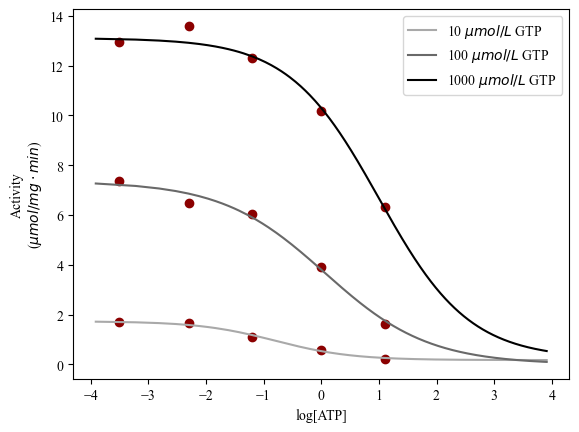

In [6]:
def plot_pred(parameters:list, colors:list, legends:list = None, save = False):
    for i in range(len(parameters)):
        a = np.arange(-15, 50, 0.02)
        fit_logy = four_param_logistic(
            a, parameters[i][0],parameters[i][1],
            parameters[i][2],parameters[i][3]
        )
        plt.plot(np.log(a), fit_logy, color = colors[i], label = legends[i])
        #print(np.log(atp_conc), activities.iloc[i, :])
        plt.scatter(np.log(atp_conc), activities.iloc[i, :], c = 'darkred')
    plt.xlabel('log[ATP]')
    plt.ylabel('Activity\n($\mu mol/mg \cdot min$)')
    plt.legend()
    if save:
        plt.savefig('All_ic50.png', dpi = 600)
    else:
        plt.show()

colors = ['darkgrey', 'dimgrey', 'black']
legends = ['10 $\mu mol/L$ GTP', '100 $\mu mol/L$ GTP', '1000 $\mu mol/L$ GTP']
plot_pred(parameters, colors, legends, False)

In [7]:
gtp_conc = [10, 100, 1000]
for i in range(3):
    ki = parameters[i][2]*1000/(1+(gtp_conc[i]/82.88))
    print(parameters[i][2])
    print(gtp_conc[i])
    print(f'{ki:.2f}')

0.4493982012133615
10
401.01
1.0654587996711633
100
482.86
2.7230059484797287
1000
208.41
